In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np


In [4]:
mnist=tf.keras.datasets.fashion_mnist
(xtr,ytr),(xts,yts)= mnist.load_data()
xtr=xtr.astype('float32')
xts=xts.astype('float32')

In [6]:
xtr=xtr/255
xts=xts/255

In [8]:
xtr.shape, xts.shape, ytr.shape, yts.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [10]:
model=Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4732)              0         
                                                                 
 dense_2 (Dense)             (None, 200)               946600    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2010      
                                                      

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(xtr,ytr,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 24s 12ms/step - loss: 0.7455 - accuracy: 0.7298
Epoch 2/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.4720 - accuracy: 0.8288
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4164 - accuracy: 0.8495
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3904 - accuracy: 0.8577
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3705 - accuracy: 0.8661
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3545 - accuracy: 0.8707
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3422 - accuracy: 0.8755
Epoch 8/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3320 - accuracy: 0.8779
Epoch 9/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3227 - accuracy: 0.8816
Epoch 10/10
1875/1875 [==============================] - 24s 13m

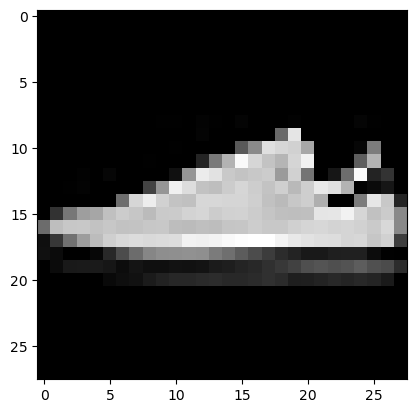

In [16]:
imgg=xtr[6]
plt.imshow(np.squeeze(imgg),cmap='gray')
plt.show()

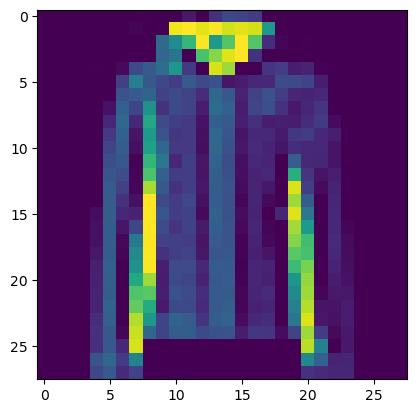

313/313 [==============================] - 1s 3ms/step
Predicted value: 4


In [19]:
n=6
#n=random.randint(0,9999)
plt.imshow(xts[n])
plt.show()
predicted_value=model.predict(xts)

plt.show()
print('Predicted value:',np.argmax(predicted_value[n]))
